# 「**Deep Learning**の扉」　　
### ③**Python**を使ってニューラルネットワークの学習を学ぶ-応用編-　　
___________________________________________________

## 1. 「Deep Learning」の世界をさらに！

前回は「③**Python**を使ってニューラルネットワークの学習を学ぶ-基礎編-」を学習しました。

損失関数をはじめ、数値微分や勾配など数学的な内容でしたね。

今回は、これらの知識を活かした内容を学んでいきます！

それでは頑張っていきましょう！

### Let's go!!
_____________

## 2. 勾配法

最適なパラメータを得なければ、良い結果を得られない。

そして、最適なパラメータを得るためにデータを学習する必要がある。

といった内容を覚えていますか？

覚えてはいるけど、最適なパラメータって結局何なんだ？

という方は少なくないと思います。

そんな方は、前回学習した損失関数を思い出してみてください。

損失関数は、パラメータが適切であるかどうかを確かめるための指標でした。

つまり、この損失関数が最小値をとる時のパラメータの値が、最適なパラメータになります。

<img src="img3_2_1.png" style="width: 700px; float:left;">

図2-1

さらっと損失関数が最小値をとる時と言いましたが、これを見つけるのは意外と大変です。

そこで、前回学習した「勾配」を利用して損失関数の最小値（出来るだけ小さな値）を探すという方法が登場します。

前回、最後の方に

#### 「勾配を「-1倍」したものが示す方向は、各場所において関数の値を最も減らす方向」

と言いました。（以後、勾配という言葉が出てきたら、「-1倍」したものだと考えてください）

勾配が指す方向が本当に関数の最小値なのかどうかはわからないため、勾配を利用しても最小値を得ることはできないかもしれません。

しかし、勾配の方向が必ず最小値を指すとは限らないにせよ、その方向に進めば、損失関数の値を小さくできることには変わりません。

そこで、タイトルにもなっている「勾配法」の登場です。

#### 勾配法では、

#### 現在の場所から勾配方向に一定の距離だけ進みます。

#### そして、一定の距離進んだ先でも同様に勾配を求め、また、その勾配方向へ進むというように、繰り返すことで、損失関数の値を徐々に減らしていきます。

このように関数の最小値を探す勾配法を

### 「勾配降下法」

と呼びます。

<img src="img3_2_2.png" style="width: 700px; float:left;">

図2-2

それでは、数学的に見ていきましょう！

勾配法を数式で表すと次の式のように書くことができます。

$$
    x_0 = x_0 - η\frac{∂f}{∂x_0}
$$

$$
    x_1 = x_1 - η\frac{∂f}{∂x_1}
$$

上式の「η」は**「学習率」**と呼ばれる数値になります。

一回の学習で、どれだけ学習するべきか、どれだけパラメータを更新するか、を決めるのがこの学習率になります。

上式は、パラメータを一回更新した時を表しています。

つまり、このパラメータ更新を何回も行うことで、徐々に損失関数の値を減らしていきます。

今回は、２変数の場合の式を表していますが、変数が増えれば、更新の式を増やせばいいので、なんら問題はありません。

ところで、

$$
    \frac{∂f}{∂x_0}
$$

は、勾配を求めてることはわかるけど、学習率とやら「η」はどんな数値？と気になりますよね。

これは、「0.01」や「0.001」などと自分で設定してあげる必要があります。

だからといって、大きすぎる値や小さすぎる値を使ってはいけません。

また、ニューラルネットワークにおいては、学習率の値を変更しながら、正しく学習できているか、損失関数の値を小さくできているかを確認する必要があります。

面倒な気がしますが、

せっかくパラメータを更新したのに、損失関数が大きくなっていた。なんて嫌ですよね。

それでは、勾配降下法をPyhtonで実装してみましょう。

In [1]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x
######「Shift + Enter」を押してください######

意外とスッキリしたコードで実装することができます。

「init_x」とは、パラメータの初期値を表しています。

この値を「x」に代入し、パラメータをどんどん更新していきます。

今回は、更新回数を「step_num=100」としており、これは１００回パラメータを更新することを表します。

また、学習率は「lr=0.01」としています。

あとは、数式通りに実装するだけになるのですが、

おや？「numerical_gradient(f, x)」ってみたことあるな。

そうなんです。これは前回の内容で実装した「勾配」を求める関数になります。

みなさん、覚えていますか？

ということで復習がてらに実装してみましょう！

【問題2-1】「勾配」を実装してください。

$$
    (\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})
$$

In [2]:
######以下にコードを書いてください######




######「Shift + Enter」を押してください######

どうですか？

覚えていましたか？

曖昧な方は前回のテキストに戻ってもらっても構いません！

では、話を戻します。

In [2]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x
######「Shift + Enter」を押してください######

この勾配降下法を表す関数を使えば、関数の極小値を求めることができます。

極小値？

最小値を求めるために、勾配降下法を使ってるんじゃなかったの？

そうですね。

もちろん、最小値を求めたくて勾配降下法を使っています。

しかし、最初の方に、勾配の指す方向は必ずしも最小値を指す方向ではないと言いました。

何を指しているのか。

それは極小値になります。

そして、

その極小値が最小値であればいいな。

というのが勾配降下法の狙いになります。

（極小値が何なのかあまりピンとこない方は、この章の終わりに説明をつけているのでそちらをご覧ください。）

では、試しに次の問題を解いてみましょう。

【問題2-2】以下の式の最小値を勾配法で求めてください。  

$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$

初期値は

$$
    (x_0, x_1) = (-3.0, 4.0)
$$

学習率は0.1、更新回数は100回としてください。

また、求める際には自分で勾配降下法を実装してみてください

In [3]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

どうですか？

$$
    (-6.1e-10, 　8.1e-10)
$$

といった結果が得られたのではないでしょうか。

この数値は、ほとんど(0, 0)に近い数値になります。

実際、真の最小値は(0, 0)なので、勾配法によって、ほぼ正しい結果を得ることができたと言えます。

では、勾配法による更新のプロセスを図示してみます。

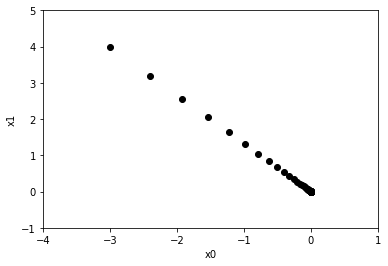

In [48]:
import numpy as np
import matplotlib.pyplot as plt
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for  idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    plt.scatter(-3.0, 4.0, color="black")
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        plt.scatter(x[0], x[1], color="black")
        
    plt.xlim(-4.0, 1.0)
    plt.ylim(-1.0, 5.0)
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

図2-3

(0, 0)が最も低い場所となっていますが、その点に向かって徐々に近づいていることが見て取れます。

ちなみに、一番左上の点が、(-3.0, 4.0)の点であり、ここからスタートしています。

そう言えば、学習率を「0.1」としましたが、他の数値にした場合どうなるのでしょうか。

そんな時は試してみることが大切です！

【問題2-3】学習率が「10.0」の時と「1e-10」の時を計算してください。  

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

どんな値になりましたか？

学習率が大きすぎると大きな値、学習率が小さすぎると初期値とほぼ変わらない値が出力されると思います。

いくら勾配が指す方向が極小値を指す方向だとしても、適切な学習率を設定しないと、極小値にたどり着かなかったり、極小値を通り越してしまうといったことが起きてしまいます。

<img src="img3_2_3.png" style="width: 700px; float:left;">

図2-4

### 2+α. 極小値

まず、ある関数「f(x)」があるとします。

この関数の微分を以下のように表現します。

$$
    \frac{df(x)}{dx} = f'(x)
$$

また、ある値「a」における「f'(x)」の値は,

$$
    x = a
$$
$$
    f'(a) = k
$$

になるとします。

この値「k」は、関数「f(x)」の「x = a」における接線の傾きになります。

例えば、

$$
    f(x) = x^2
$$

だとすると、「x=-1」における接線の傾きは、

$$
    f'(x) = 2x
$$

より、

$$
    f'(-1) = -2
$$

となります。

これをグラフで表すと、

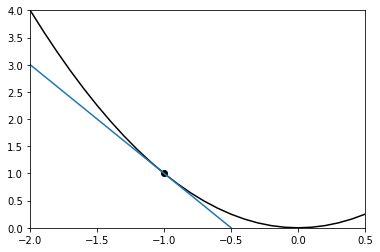

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2.0, 2.0, 0.1)
y1 = x**2
y2 = -2*x - 1

plt.plot(x, y1, color="black")
plt.plot(x, y2)
plt.scatter(-1, 1, color="black")
plt.xlim(-2.0, 0.5)
plt.ylim(0, 4)
plt.show()

図2-5

となります。

見てもらうとわかりますが、傾きが「負」であれば、接線は右肩下がりの直線になります。

では、「x=-0.5」の場合はどうなるのでしょうか。

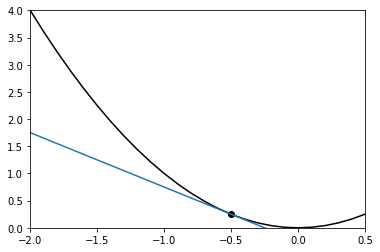

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2.0, 2.0, 0.1)
y1 = x**2
y2 = -x - 0.25

plt.plot(x, y1, color="black")
plt.plot(x, y2)
plt.scatter(-0.5, 0.25, color="black")
plt.xlim(-2.0, 0.5)
plt.ylim(0, 4)
plt.show()

緩やかな直線になりましたね。

では、「x=0」と「x=0.5」の場合はどうなるのでしょうか。

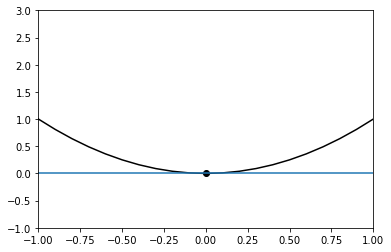

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2.0, 2.0, 0.1)
y1 = x**2
y2 = np.zeros_like(x)

plt.plot(x, y1, color="black")
plt.plot(x, y2)
plt.scatter(0, 0, color="black")
plt.xlim(-1.0, 1.0)
plt.ylim(-1, 3)
plt.show()

図2-6

「x=0の場合」

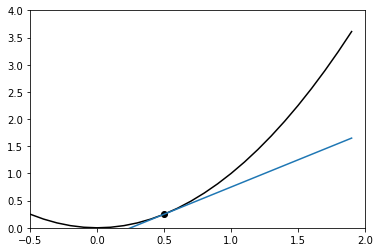

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2.0, 2.0, 0.1)
y1 = x**2
y2 = x -0.25

plt.plot(x, y1, color="black")
plt.plot(x, y2)
plt.scatter(0.5, 0.25, color="black")
plt.xlim(-0.5, 2.0)
plt.ylim(0, 4)
plt.show()

図2-7

「x=0.5の場合」

「x=-1」は右肩下がりだったのに、「x=0」では平坦、「x=0.5」では、右肩上がりになってしまいました。

つまり、接線の傾きが、「負」から「正」に変わったのです。

どの点を境に「負」から「正」に変わったのか。

それは接線が平坦になったとき、

つまり、

#### 「x=0」

になります。

言い換えると、

#### 「x=0」を境に、関数f(x)の微分の値「f'(x)」が負から正に変わる

となります。

この「f'(x)」が負から正に変わる点を**極小値**と呼ぶのです。

今回の場合では、「x=0」が極小値となります。

また、この点は最小値でもあります。

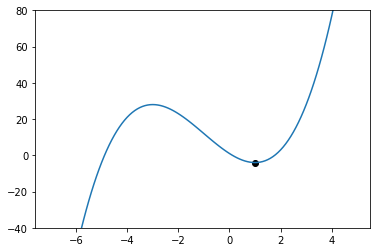

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return x**3 + 3*x**2 - 9*x + 1

x = np.arange(-7.0, 5.0, 0.1)
y = function(x)

plt.plot(x, y)
plt.scatter(1.0, -4.0, color="black")
plt.ylim(-40, 80)
plt.show()

図2-8

では、上記のような関数の場合はどうなるのでしょうか。

先ほどの例と同じように考えると、黒点あたりが極小値だとわかりますね。

しかし、この関数は極小値より小さい値を取ることができるので、極小値が最小値と言い切ることができません。

もう一度言いますが、

#### 極小値は、f'(x)が負から正に変わる点であり、最小値とは言い切れない

ということを頭に入れておいてください！

## 3. ニューラルネットワークにおける勾配の適用

前回は勾配について、今回は勾配法（詳しくは勾配降下法）について学習しました。

何のために学習したのか。

それは、ニューラルネットワークにおいて最適なパラメータを学習するためです！

ニューラルネットワークでは、どんなパラメータが登場したでしょうか。

そうですね。

「重み」と「バイアス」です。

今回は、重みパラメータに関する損失関数の勾配を計算していきましょう！

まずは、形状が２×３の重み「W」を持つニューラルネットワークがあり、損失関数をLで表す場合を考えてみます。

この場合、勾配は

$$
    \frac{∂L}{∂W}
$$

と表すことができます。

また、実際に数式で表すと

$$
    W = \left(
\begin{matrix} 
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} 
\end{matrix} 
\right)
$$

$$
\frac{∂L}{∂W} = \left(
\begin{matrix} 
\frac{∂L}{∂w_{11}} & \frac{∂L}{∂w_{12}} & \frac{∂L}{∂w_{13}} \\ 
\frac{∂L}{∂w_{21}} & \frac{∂L}{∂w_{22}} & \frac{∂L}{∂w_{23}} 
\end{matrix} 
\right)
$$

という風になります。

１行１列目の要素である

$$
    \frac{∂L}{∂w_{11}}
$$

は、「w<sub>11</sub>」を少し変化させると損失関数「L」がどれだけ変化するか、ということを表します。

他の要素も同様です。

それでは、実際に勾配を求める実装を行います。

実装を行う準備として、「ソフトマックス関数」や「交差エントロピー誤差」を実装してもらいます。

前回の内容でもあるので、復習として取り組んでください！

【問題3-1】ソフトマックス関数を実装してください。

$$
   y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$

In [36]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

【問題3-2】交差エントロピー誤差を実装してください。

$$
    E = -\sum_{k}t_k*logy_k
$$

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

復習できましたか？

それでは、本題に戻りましょう。

まず、以下のような「simpleNet」というクラスを実装したいと思います。

In [91]:
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

このクラスは、形状が２×３の重みパラメータを一つだけインスタンス変数として持ちます。

そして、二つのメソッドがあり、一つは「predict(x)」、もう一つは「loss(x, t)」になります。

「predict(x)」は入力「x」と重み「W」の行列の積を計算し、予測するメソッドであり、

「loss(x, t)」は最終的に損失関数を計算するメソッドになります。

また、「x」には入力データ、「t」には正解ラベルが入力されます。

クラスにあまり慣れていない方は、「レシピ」だと思ってください！

カレーのレシピとか、ハンバーグのレシピとか、唐揚げとか、ケーキとか、マカロンとか。

食べ物って美味しいですよね〜。

という話は置いといて。

クラスがレシピなら、インスタンスとメソッドは？と思いますよね。

インスタンスは材料で、メソッドは調理方法になります！

例えば、カレーでいうと、

インスタンスは、ジャガイモや人参、玉ねぎ、肉（牛？鶏？豚？）などで、

メソッドは、材料を切ったり、材料を煮込んだりといったものになります。

<img src="img3_2_4.png" style="width: 700px; float:left;">

図3-1

このことから、「simpleNet」というクラスは、

「simpleNet」というレシピであり、そこには、

・材料「２行３列の重み」を準備する。

・〜といった手順で材料を調理する。（予測し、損失関数を計算する。）

と書かれている。

と表現することができます。

<img src="img3_2_5.png" style="width: 700px; float:left;">

図3-2

それではこのクラスを使ってみましょう！

In [196]:
def cross_entropy_error(y, t):
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
    
net = simpleNet()
print(net.W)
######「Shift + Enter」を押してください######

[[ 0.80001485 -0.11320443  0.17635342]
 [ 2.00410625  0.87028403  1.63448519]]


ではこの重みを使って、予測してみます。

In [93]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.72967371  0.85191776 -1.26469844]


最終的な出力が三つと仮定して、正解ラベルを以下のようにします。

In [94]:
t = np.array([1, 0, 0])

では、損失関数はどのようになるのでしょうか。

In [95]:
net.loss(x, t)

2.7606494560014

それでは、勾配を求めてみましょう。

今までは、１変数や２変数の場合の勾配を求めてきましたが、今回用いる重みのパラメータの形状は2×3なので、6変数の場合の勾配を考える必要があります。

6変数の場合に対応したものが以下のコードになります。

In [207]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

-----------------
少し上記のコードについて説明を加えます。

上記のコードに登場した「np.nditer」は、インデックスをタプル形式で順番に返す関数になります。

具体例を見た方がわかりやすいので、以下に例を示します。

まず、形状が2×3の配列を作成します。

In [16]:
np_array = np.random.randn(2, 3)
print(np_array)

[[ 0.59792512  0.01589526 -0.32669315]
 [ 0.65215972 -0.81442417 -0.04692157]]


それでは、「np.nditer」を使って、np_arrayの要素を取り出してみます。

In [19]:
nditer = np.nditer(np_array, flags=['multi_index'], op_flags=['readwrite'])
while not nditer.finished:
    print(nditer.multi_index)
    print(np_array[nditer.multi_index])
    nditer.iternext()

(0, 0)
0.5979251191681487
(0, 1)
0.01589525644828395
(0, 2)
-0.32669315221809325
(1, 0)
0.6521597249040858
(1, 1)
-0.8144241747587121
(1, 2)
-0.04692156920732403


まず、「while not 条件式：」は、条件式を満たすまで、処理を繰り返すというループ文になります。

また、「nditer.multi_index」にインデックスが格納されており、「np_array[nditer.multi_index]」と指定することで、インデックスに対応する要素を取り出すことができます。

正直、以下のようなコードでも配列の要素を取り出すことはできます。

In [20]:
np_array[0][0]

0.5979251191681487

In [23]:
np_array[0,0]

0.5979251191681487

しかし、配列の要素をまとめて取り出すには、二重のfor文を使う必要があります。

例えば、

In [24]:
for i in range(2):
    for j in range(3):
        print(np_array[i, j])

0.5979251191681487
0.01589525644828395
-0.32669315221809325
0.6521597249040858
-0.8144241747587121
-0.04692156920732403


二次元配列の場合、この程度で済みますが、三次元配列や四次元配列、もしくはそれ以上の多次元配列の場合、どうなるのでしょうか？？

おそらく、何重にもfor文を重ねることになります。

面倒な感じがしますよね。

それだけでなく、for文を重ねて書くときに、どの順番で書けばいいのかわからなくなる可能性もあります。

そこで、「np.nditer」を使うことによって、多次元配列の要素を簡単に取り出すことができます。

「np.nditer」については、このくらいにして、本題に戻りたいと思います！

---------------

「numerical_gradient」を使う前に、以下のような関数を定義します。

In [97]:
def f(W):
    return net.loss(x, t)

なぜ、わざわざこのように置き換えたのか。

それは、「numerical_gradient(f, x)」のコードを思い出してもらうとわかると思うのですが、内部で「f(x)」を実行するため、それと整合性が取れるようにf(W)に置き換えます。

もし、置き換えずに実行すると、

In [37]:
numerical_gradient(net.loss(x, t), net.W)

TypeError: 'numpy.float64' object is not callable

このようにエラーが表示されてしまいます。

In [98]:
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.56204877  0.50163287  0.0604159 ]
 [-0.84307315  0.7524493   0.09062385]]


「numerical_gradient(f, x)」の引数fは関数であり、xは関数fの引数になります。

今回の場合では、net.Wをを引数に取り、損失関数を計算する新しい関数fを定義してあげる必要があります。

それが先ほど置き換えた「f(W)」になります。

そして、新しく定義した「f(W)」を、「numerical_gradient(f, x)」に渡します。

_________

「f(W)」を新しく定義したところで、返す値は「net.loss(x, t)」であるため、これだけの説明だけだと直感的にはわかりにくいかもしれません。

そこで、わかりやすくするために、「net.loss(x, t)」を詳しく見ていきたいと思います。

In [ ]:
def f(W):
    return net.loss(x, t)

この「net.loss(x, t)」は、

In [ ]:
def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    
    return loss

という計算を行う関数でした。

「net.loss(x, t)」を書き直すと、

In [ ]:
net.loss(x, t) = cross_entropy_error(y, t)
               = cross_entropy_error(softmax(z), t)
               = cross_entropy_error(softmax(net.predict(x)), t)

となります。

また、「net.predict(x)」は、

In [ ]:
def predict(self, x):
    return np.dot(x, self.W)

という関数になります。

つまり、

In [ ]:
net.loss(x, t) = cross_entropy_error(softmax(self.predict(x)), t)
               = cross_entropy_error(softmax(np.dot(x, net.W)), t)

となります。

この結果から、「net.loss(x, t)」は「net.W」を含む関数であることがわかります。

このことから、

In [ ]:
def f(W):
    return net.loss(x, t)

と定義し直しても問題ないことがわかります。

______

それでは、話を戻します。

「numerical_gradient(f, net.W)」の結果は、dWであり、形状は重みと同様2×3になります。

dWの中身を見ると、

$$
    \frac{∂L}{∂w_{11}}
$$

は、「-0.16835309」という値を示しています。

これは、「w<sub>11</sub>」をhだけ増加させると、損失関数の値がおよそ「-0.17h」だけ増加する、すなわち、「0.17h」だけ減少するということを表しています。

また、「w<sub>12</sub>」の場合は、およそ「0.04h」だけ増加するということを表しています。

つまり、損失関数の値を減少させるには、「w<sub>11</sub>」はプラス方向に更新し、「w<sub>12</sub>」はマイナス方向に更新した方が良いということがわかります。

また、更新度合いについて考えると、

$$
    \frac{∂L}{∂w_{12}}
$$

よりも

$$
    \frac{∂L}{∂w_{11}}
$$

の方が大きく貢献することがわかります。

それは、勾配の絶対値の大小関係に起因します。

$$
    |\frac{∂L}{∂w_{11}}| > |\frac{∂L}{∂w_{12}}|
$$


このようにニューラルネットワークの勾配を求めれば、あとは勾配法に従って、重みのパラメータを更新するだけになります。

------
先ほど、整合性が取れるように「f(W)」と定義し直しましたが、Pythonでは簡単な関数であれば、「lambda」を使って書くこともできます。

「lambda」を使って書き直すと以下のようになります。

In [39]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[-0.16833856,  0.04683889,  0.12149967],
       [-0.25250784,  0.07025833,  0.18224951]])

これ以外に「lambda」を使った簡単な例を紹介します。

In [45]:
#商品の消費税を計算する
f = lambda x: x*0.1

#１０００円の商品
y = f(1000)
print("この商品の消費税は%.2f円です" % y)

この商品の消費税は100.00円です


このように書くことで、「def 関数名：」とわざわざ定義する必要がなくなります。

ただ、簡単な関数に限るので、複雑な関数を作る場合は、「def 関数名：」を使ってください！！

-----

次の章に行く前に手を動かしてみましょう！！

【問題3-3】以下の手順に沿って、ニューラルネットワークの勾配を計算してください。

#### 1.ソフトマックス関数を出力層の活性化関数に設定
$$
   y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$

In [99]:
#ソフトマックス関数を実装
def softmax(a):
    
    
    return 

######「Shift + Enter」を押してください######

#### 2.交差エントロピー誤差を損失関数に設定
$$
    E = -\sum_{k}t_k*logy_k
$$

In [128]:
#交差エントロピー誤差を実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return #この部分を消して埋める# / batch_size

######「Shift + Enter」を押してください######

#### 3.ニューラルネットワーク「simpleNet」を実装

In [ ]:
#simpleNetを実装
#numpyをインポート
import 

class SimpleNet:
    
    def __init__(self):
        #形状が2×3の重みを取得してください（np.random.randn）
        self.W = 
        
    def predict(self, x):
        #入力と重みの行列積を計算
        return 
    
    def loss(self, x, t):
        #活性化関数には「softmax」を使用
        z = 
        y =
        loss = 
        #損失関数の結果を返す
        return 

#### 4.勾配を求める関数。以下のコードを実行するだけで良い。

In [1]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad
######「Shift + Enter」を押してください######

#### 5.以下の入力とラベルを使って、勾配を計算する。ただし、「net.loss」を再定義し、整合性を保つこと。

**入力は[1.5, 2.3]**

**ラベルは[0, 1, 0]**

を用いる。

In [ ]:
#入力とラベルの配列を作成する
x = 
t = 

#「numerical_gradient」を用いる

######「Shift + Enter」を押してください######

----
ここまでの内容で、**「ニューラルネットワークの学習」**に関する基本的な知識を学ぶことができました！！

「損失関数」「ミニバッチ」「勾配」「勾配降下法」と、学習において重要なキーワードが登場しました。

問題3-3で損失関数の勾配の算出を復習してもらいましたが、ニューラルネットワークの学習の手順について確認したいと思います。

まず、前提から確認します。

ニューラルネットワークは、適応可能な重みとバイアスがあり、この重みとバイアスを訓練データに適応するように調整することを「学習」と呼びます。

学習の手順は以下になります。

**step1（ミニバッチ）**  
訓練データの中からランダムに一部のデータを選び出します。（例えば、１０００枚の画像の中から５０枚を選ぶなど。）ここでは、そのミニバッチの損失関数の値を減らすことを目的とします。

**step2（勾配の算出）**  
ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求めます。勾配は、損失関数の値を最も減らす方向を示します。（例えば、勾配が0.5の場合、重みをh動かすと、損失関数の値が0.5hだけ増加するということを表しています。）

**step3（パラメータの更新）**  
重みパラメータを勾配方向に微小量だけ更新します。（例えば、勾配が0.5の場合、損失関数を小さくするには、重みを-0.5ηすれば良いということになります。）

**step4（繰り返す）**  
step１からstep３を繰り返します。

ニューラルネットワークの学習は、上記の４つの手順による方法で行います。

この方法は、勾配降下法によってパラメータを更新する方法になりますが、ここで使用するデータはミニバッチとしてランダムに選ばれたデータを使用しているので、**確率的勾配降下法**と呼ばれます。

また、確率的勾配降下法は、英語の頭文字を取って、**SGD**と呼ばれます。

それでは、実際に手書き数字を学習するニューラルネットワークを実装していきましょう！！

## 4. 学習アルゴリズムの実装

### 4-1.手書き数字を学習するニューラルネットワークの実装

実際に手書き数字を学習するニューラルネットワークを実装していくのですが、今回は２層のニューラルネットワークを使います。２層のニューラルネットワークというのは、入力層・１つの隠れ層・出力層で構成されています。

それでは、早速実装していきたいと思います！！

ここでは「sigmoid関数」と「softmax関数」を実装するのですが、今までの内容に少し工夫を加えています。

工夫については、章末に紹介したいと思います。

また、勾配を求めるために「numerical_gradient」を使いたいのですが、

手書き数字を学習するニューラルネットワークの実装には、たくさんのデータを扱うため、「numerical_gradient」を使うと、計算量が多く、処理が終わるまでにかなりの時間がかかってしまいます。

そこで、「gradient」というすぐ計算が完了するメソッドを使います。

「gradient」は**誤差逆伝播法**を使って勾配を計算するのですが、今後の内容になるので、説明は省略します。

In [9]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [2]:
### sigmoid関数
def sigmoid(a):
    sigmoid_range = 34.538776394910684
    a2 = np.maximum(np.minimum(a, sigmoid_range), -sigmoid_range)
    return 1/(1+np.exp(-a2))


### sigmoid関数を微分したもの
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


###　損失関数cross_entropy_error
def cross_entropy_error(y, t):
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


### softmax関数
def softmax(a):
    c = np.max(a, axis=-1, keepdims=True)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a, axis=-1, keepdims=True)
    y = exp_a / sum_exp_a
    return y


### ネットワークの作成
class TwoLayerNet:
    
    ### 重みやバイアスの初期化
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)
    
    ### 行列積やバイアスの加算による推論処理
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    ### 損失関数の値の計算
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    
    ### 精度の計算
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
        
    ### 勾配の計算
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    ### 誤差逆伝播を使用した勾配の計算（numerical_gradientより計算スピードが速い）
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

    
######「Shift+Enter」を押してください######

------

それでは、上記のクラスについて詳しく見ていきたいと思います。

### ①

In [ ]:
def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)

「__init__(self, input_size, hidden_size, output_size)メソッド」はクラスの初期化メソッドになります。それぞれの引数は以下の内容を意味します。

・「input_size」：入力層のニューロン数  
・「hidden_size」：隠れ層のニューロン数  
・「output_size」：出力層のニューロン数  

また、この初期化メソッドによって、重みパラメータの初期化を行います。

重みパラメータの初期値をどのような値に設定するかという問題は、ニューラルネットワークの学習を成功させる上で重要なポイントとなっています。

（今回、重みはガウス分布に従う乱数で初期化し、バイアスは０で初期化しています。）

上記の「params」は、ニューラルネットワークのパラメータを保持するディクショナリ変数になります。

params['W1']は、１層目の重み（形状：input_size × hidden_size）、  
params['b1']は、１層目のバイアス（形状：1 × hidden_isze）、  
params['W2']は、２層目の重み（形状：hidden_size × output_size）、  
params['b2']は、２層目のバイアス（形状：1 × output_size）  

になります。

### ②

In [ ]:
def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y

この関数は、入力に対し、推論処理を行います。

隠れ層の活性化関数は、「sigmoid関数」であり、出力層の活性化関数には、「softmax関数」を使っています。

### ③

In [ ]:
def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)

推論を行った結果（ニューラルネットワークの出力）を用いて、損失関数の値を計算します。

引数の「x」は画像データ（入力）であり、「t」は正解ラベルになります。

### ④

In [ ]:
def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])

この関数は、以下の手順で認識精度を求めます。

まず、「self.predict(x)」によって推論処理を行います。

それによって得られた出力結果の中で、最大となる値のインデックスを取り出します。

例えば、

In [137]:
np_array = np.array([0.1, 0.2, 0.3])
np.argmax(np_array)

2

In [139]:
np_array[2]

0.3

このように、配列の中で最大となる値のインデックスを返します。

また、「axis=1」を指定することによって、向きを指定することができます。

「axis=1」は、行方向、つまり、横方向になります。

例えば、

In [142]:
np_array = np.array([[0.2, 0.4], [0.5, 0.1]])
np.argmax(np_array, axis=1)

array([1, 0])

このように、「axis=1」と指定することによって、

In [143]:
np.argmax([0.2, 0.4])

1

In [144]:
np.argmax([0.5, 0.1])

0

といった処理をまとめて行うことができます。

このような処理を正解ラベル「t」においても行い、

最終的に「y=t」となる個数を数え上げます。

また、数えたものを入力画像枚数で割ることによって、認識精度が求められます。

（例えば、100枚中56枚出力結果とラベルが一致。つまり、認識精度は56%）

### ⑤

In [212]:
def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

「numerical_gradient」は、パラメータに対する勾配を求めます。

gradsは、勾配を保持するディクショナリ変数になります。

grads['W1']は、１層目の重みの勾配、  
grads['b1']は、１層目のバイアスの勾配、  
grads['W2']は、２層目の重みの勾配、  
grads['b2']は、２層目のバイアスの勾配

になります。

------

それでは、具体的に見ていきたいと思います。

In [5]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

for key in ['W1', 'b1', 'W2', 'b2']:
    print(key + 'の形状：',net.params[key].shape)

W1の形状： (784, 100)
b1の形状： (100,)
W2の形状： (100, 10)
b2の形状： (10,)


上記のように、params変数には、このネットワークに必要なパラメータがすべて格納されています。

そして、params変数に格納されたパラメータが、推論処理で使われます。

推論処理は次のように実行することができます。

入力には適当なものを使用します。

In [186]:
x = np.random.randn(100, 784)
y = net.predict(x)

また、grads変数には、params変数と対応するように、各パラメータの勾配が格納されます。

それでは、「numerical_gradient」を使って勾配を計算したいと思います。

ここでも適当な入力とラベルを使います。

In [216]:
x = np.random.randn(100, 784)
t = np.random.rand(100, 10)
grads = net.gradient(x,t)

In [220]:
for key in ['W1', 'b1', 'W2', 'b2']:
    print(key+'の勾配の形状：', grads[key].shape)

W1の勾配の形状： (784, 100)
b1の勾配の形状： (100,)
W2の勾配の形状： (100, 10)
b2の勾配の形状： (10,)


それでは、「TwoLayerNet」の実装について見ていきましょう。

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

手書き数字認識を行う場合、画像を入力します。

画像の形状は28×28なので、入力サイズは28×28=784になります。

また、今回は0から9の10クラスに分類するので、出力サイズは10になります。

隠れ層であるhidden_sizeには、適当な値を設定します。

### 4-2.ミニバッチ学習の実装

ニューラルネットワークの学習の実装は、ミニバッチ学習で行います。

ミニバッチ学習というのは、訓練データの中からランダムにデータを取り出し、そのデータを対象に、勾配法によりパラメータを更新する手法になります。

例えば、訓練画像が1000枚あるとすれば、その中から100枚ランダムに取り出します。

それでは、「TwoLayerNetクラス」を使ってミニバッチ学習を行っていきたいと思います！！

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 手書き数字データのMNISTデータセットを読み込む
mnist = datasets.fetch_openml('mnist_784', version=1)

### MNISTデータセットからデータを取り出す
data = mnist.data

### MNISTデータを正規化する
std_data = data/255

### MNISTデータセットからラベルを取り出す
label = mnist.target

### ラベルをone_hot_label表現に変換
label = [int(x) for x in label]
one_hot_label = np.identity(10)[label]

### 訓練データとテストデータ、訓練ラベルとテストラベルに分ける
x_train, x_test, t_train, t_test = train_test_split(std_data, one_hot_label, test_size=0.2)

In [7]:
### 訓練による損失関数の値を格納する空のリストの作成
train_loss_list = []

### パラメータの更新回数
iters_num = 10000

### 訓練データの数
train_size = x_train.shape[0]

### バッチサイズ
batch_size = 100

### 学習率
learning_rate = 0.1

### ネットワークの作成（入力サイズ：784、隠れ層：50、出力層：10） 
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

### 訓練ループ
for i in range(iters_num):
    ### 訓練データからランダムにバッチサイズ分のデータを取り出す
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    ### 勾配を計算する
    grad = network.gradient(x_batch, t_batch)
    
    ### 勾配によって、パラメータを更新する
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    ### 損失関数の値を計算する
    loss = network.loss(x_batch, t_batch)
    
    ### 計算した損失関数の値をリストに追加する
    train_loss_list.append(loss)

ここでは、ミニバッチのサイズを100として、毎回60000個の訓練データからランダムに100個のデータを抜き出しています。

画像データだけでなく、正解ラベルデータも抜き出します。

そして、抜き出した100個のミニバッチを対象に勾配を求め、確率勾配降下法（SGD）によりパラメータを更新します。

また、勾配法によるパラメータの更新回数を10000回とし、更新するごとに、訓練データに対する損失関数を計算し、その値を配列「train_loss_list」に追加します。

つまり、10000回の処理が終わると、配列「train_loss_list」は10000個の要素を保持するリストになります。

それでは、損失関数の値の推移をグラフで表したいと思います！！

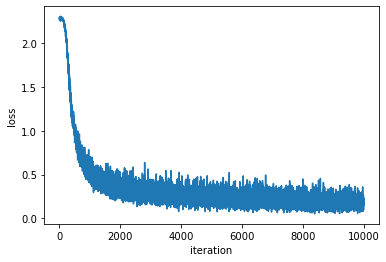

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10000)
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

上のグラフを見ると、学習の回数が進むにつれて、損失関数の値が減っていくことがわかります。

これは、学習がうまくいっていることを表しており、ニューラルネットワークの重みパラメータが徐々にデータに適応していることを意味しています。

このように、何度も勾配法によってパラメータを更新することで、最適なパラメータへと徐々に近づいているのです！！

### 4-3.テストデータで評価

図の結果より、学習を繰り返し行うことで損失関数の値が徐々に下がっていくことを確認できました。

しかし、一つ注意すべきポイントがあります。

それは、ミニバッチ学習によって得られた損失関数の値というのは、「訓練データ」に対するものである、ということです。

訓練データの損失関数の値が減ることは、ニューラルネットワークの学習が上手くいっている証拠なのですが、この結果だけでは、このネットワークモデルの汎用性を保証することはできません。

ニューラルネットワークの学習では、訓練データ以外のデータを正しく認識できるかどうかを確認する必要があります。

というのも、過学習を起こしていないかの確認を行うのです。

過学習を起こしている場合、訓練データにおいては正しく分類できるが、訓練データに含まれない他のデータにおいては分類できない、ということになります。

そもそもニューラルネットワークの学習で目的とすることは、汎用性を得ることです。

そのため、ニューラルネットワークの汎用性を評価するために、訓練データ以外のデータを使う必要があります。

そこで、次の実装では、ニューラルネットワークの学習を行う過程で、定期的に訓練データとテストデータを対象に、認識精度を記録することにします。

ここでは、１エポックごとに、訓練データとテストデータの認識精度を記録します。

-----

**エポック**とは、単位のことを表し、１エポックとは学習において訓練データをすべて使い切った時の回数に対応します。

例えば、

1. 10000個の訓練データに対して、100個のミニバッチで分割する。

2. 各ミニバッチを学習に回す。つまり、10000/100=100回学習を繰り返す。

この場合、1.と2.の手順を1回実行することを１エポックと呼びます。

では、「手書き数字認識」の場合を考えてみましょう。

1. 60000個の訓練データに対して、100個のミニバッチで分割する。

2. 各ミニバッチを学習に回す。つまり、60000/100=600回学習を繰り返す。

この場合、1.と2.の手順を1回実行することを1エポックと呼びます。

-----

それでは、正しい評価ができるように、実装していきたいと思います。

In [3]:
import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
mnist = datasets.fetch_openml('mnist_784', version=1)
data = mnist.data
std_data = data/255
label = mnist.target
label = [int(x) for x in label]
one_hot_label = np.identity(10)[label]
x_train, x_test, t_train, t_test = train_test_split(std_data, one_hot_label, test_size=0.2)

### 訓練時の損失関数の値を格納するための空のリスト
train_loss_list = []
### 訓練時の精度を格納するための空のリスト
train_acc_list = []
### テスト時の精度を格納するための空のリスト
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

### 何回の学習を１エポックとするか
iter_per_epoch = max(train_size/batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    ### 学習回数が１エポックあたりの学習回数に達した時、訓練時の精度とテスト時の精度を計算して表示する
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        n = i/iter_per_epoch
        n = int(n)
        print(str(n)+"epoch：train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

0epoch：train acc, test acc | 0.09771428571428571, 0.09664285714285714
1epoch：train acc, test acc | 0.78125, 0.7702142857142857
2epoch：train acc, test acc | 0.8766071428571428, 0.8683571428571428
3epoch：train acc, test acc | 0.8976785714285714, 0.8912142857142857
4epoch：train acc, test acc | 0.9067678571428571, 0.9020714285714285
5epoch：train acc, test acc | 0.9135178571428572, 0.91
6epoch：train acc, test acc | 0.9178214285714286, 0.9154285714285715
7epoch：train acc, test acc | 0.9222678571428572, 0.9177142857142857
8epoch：train acc, test acc | 0.925375, 0.9222857142857143
9epoch：train acc, test acc | 0.9293035714285715, 0.9237142857142857
10epoch：train acc, test acc | 0.9300714285714285, 0.9252857142857143
11epoch：train acc, test acc | 0.9341964285714286, 0.9286428571428571
12epoch：train acc, test acc | 0.9360714285714286, 0.931
13epoch：train acc, test acc | 0.9381428571428572, 0.933
14epoch：train acc, test acc | 0.9408035714285714, 0.9351428571428572
15epoch：train acc, test acc | 0.94

上の例では、１エポックごとに、全ての訓練データとテストデータに対して認識精度を計算して、その結果を記録します。

なぜ１エポックごとに認識精度を計算するのか。

それは、「iters_num」の回数分、認識精度を計算していては、時間がかかってしまうからです。

今回の場合、「iters_num=10000」としているので、10000回認識精度を計算することになり、大変だということがわかります。

また、そこまで細かい精度で認識精度を記録する必要もないからです。

そのため、訓練データの１エポックごとに認識精度の経過を記録します。

さて、上記のコードで得られた結果をグラフで表したいと思います！

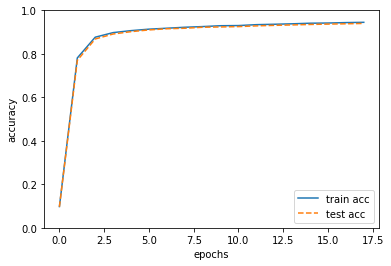

In [4]:
import numpy as np
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データの認識精度を実線で示し、テストデータの認識精度を波線で表しています。

グラフを見てもらうとわかるのですが、エポックが進むにつれて、訓練データとテストデータを使って評価した認識精度は両方とも向上していることがわかります。

また、二つの認識精度には差がないことから、今回の学習では過学習が起きていないことがわかります。

ここで、画像認識ができているのか具体的に確認するために、学習が完了したモデルに一枚の画像を入力してみたいと思います。

以下の画像を入力します。

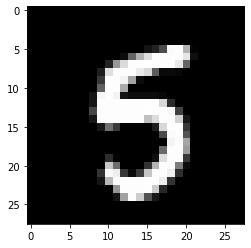

画像の正解ラベル：5


In [70]:
img = x_test[1]*255
img = img.reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.show()
print('画像の正解ラベル：'+str(t_test[1].argmax()))

In [79]:
out = network.predict(x_test[1])
print('出力結果の中で最大値を取るインデックス：'+str(out.argmax()))
print('インデックス「5」に対する出力結果：'+str(out[out.argmax()]))

出力結果の中で最大値を取るインデックス：5
インデックス「5」に対する出力結果：0.9928207218548443


このように、「5」の画像に対し、約0.99つまり99%の確率で「5」の画像であると予測しています。

これらのことから、ノートブック「DeepLearning2.ipynb」で作成したニューラルネットワークよりも圧倒的に正確に分類できており、優れたモデルになっていることがわかります。

今回の実装を通して、

「パラメータを学習することの重要さ」や

「学習することによって最適なパラメータが得られる」

ということを味わってもらえたのではないでしょうか？？

--------

### 4+α.「sigmoid」と「softmax」の工夫

ここでは、先ほどの実装で用いた「sigmoid」と「softmax」の工夫について説明していきたいと思います。

工夫に関しては、無理に理解する必要はありません！

しかし、知っておいても損はないと思うので、余力のある方は読んでみてください！

### 4+α-1.「sigmoid」

まず、「sigmoid関数」について見ていきます。

In [3]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

この「sigmoid関数」に色々な数値を入力してみたいと思います。

In [4]:
sigmoid(1)

0.7310585786300049

In [5]:
sigmoid(0)

0.5

「sigmoid関数」に「0」や「1」を入力した場合、正しく計算できており、正しい値が返ってきます。

それでは、「1000」や「-1000」を入力した場合はどうなるのでしょうか。

In [9]:
sigmoid(1000)

1.0

In [8]:
sigmoid(-1000)

/Users/imanishiwataru/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

「1000」や「-1000」を入力した場合、それぞれ「1.0」や「0.0」と返ってきてしまいました。

「sigmoid関数」の式を思い出してもらうとわかるのですが、「sigmoid関数」が「1.0」や「0.0」を返すことはありません。

なぜ、あり得ない数値が返ってくるのか。

それは、Numpyでの実数演算は、精度が有限桁の不動小数点を用いて行っているため、オーバーフローやアンダーフローといった不動小数点エラーを生じてしまうからです。

そこで、手書き数字認識の実装を行う際にも不動小数点エラーが生じると困るので、工夫を加えます。

今回は、「sigmoid関数」の入力が小さすぎる場合や、大きすぎる場合に処理を分けることで不動小数点エラーを生じないようにします。

「sigmoid関数」の出力値の範囲を次のような区間に分けて処理を行います。

・10<sup>-15</sup>より小さくなる場合では10<sup>-15</sup>の定数を出力  
（入力値が「-34.538776394910684」よりも小さい場合）

・10<sup>-15</sup>以上1-10<sup>-15</sup>以下の場合では、「sigmoid関数」の出力を採用  
（入力値が「-34.538776394910684」よりも大きく、「34.538776394910684」よりも小さい場合）

・1-10<sup>-15</sup>より大きくなる場合では1-10<sup>-15</sup>の定数を出力  
（入力値が「34.538776394910684」よりも大きい場合）

また、「sigmoid関数」の出力が10<sup>-15</sup>となる時の入力値は、「-34.538776394910684」なので、この値を使います。

$$
    10^{-15} = \frac{1}{1+exp(34.538776394910684)}
$$

これらの内容を実装すると以下のようになります。

In [11]:
def sigmoid(a):
    sigmoid_range = 34.538776394910684
    a2 = np.maximum(np.minimum(a, sigmoid_range), -sigmoid_range)
    return 1/(1+np.exp(-a2))

「np.maximum(a, b)」は、「aとbを比べたときに大きい方を採用する」関数であり、

「np.minimum(a, b)」は、「aとbを比べたときに小さい方を採用する」関数になります。

つまり、「a2 = np.maximum(np.minimum(a, sigmoid_range), -sigmoid_range)」というのは、

入力値と「sigmoid_range」のどちらが小さいのかを比較し、採用した数値と「-sigmoid_range」のどちらが大きいのかを比較しています。

### ①-sigmoid_range < a < sigmoid_range  
「a」は「sigmoid_range」より小さいので、「np.minimum(a, sigmoid_range)」により、「a」が採用されます。  
また、「a」は「-sigmoid_range」より大きいので、「np.maximum(a, -sigmoid_range)」により、「a」が採用されます。

### ②sigmoid_range < a  
「sigmoid_range」は「a」より小さいので、「np.minimum(a, sigmoid_range)」により。「sigmoid_range」が採用されます。  
「-sigmoid_range」は「sigmoid_range」を-1倍したものなので、「sigmoid_range」の方が大きいことがわかります。  
つまり、「sigmoid_range」が採用されます。

### ③a < -sigmoid_range  
「a」は「sigmoid_range」より小さいので、「a」が採用されます。  
また、「a」よりも「-sigmoid_range」の方が大きいので、「-sigmoid_range」が採用されます。

①から③より、「a2 = np.maximum(np.minimum(a, sigmoid_range), -sigmoid_range)」によって上手く実装できていることがわかります。

それでは、工夫を加えた「sigmoid関数」に「1000」や「-1000」を入力してみたいと思います。

In [12]:
sigmoid(1000.)

0.9999999999999989

In [13]:
sigmoid(-1000.)

1e-15

このように、「1.0」や「0.0」といった値は返ってこなくなりました。

### 4+α-2.「softmax」

In [ ]:
def softmax(a):
    c = np.max(a, axis=-1, keepdims=True)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a, axis=-1, keepdims=True)
    y = exp_a / sum_exp_a
    return y

それでは、「softmax関数」についてみていきたいと思います。

「softmax関数」は、元々オーバーフロー対策が行われていました。

では、どのような工夫を加えるのか。

以前の「softmax関数」は以下のようなコードでした。

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

二つのコードの違いは、

「np.max」と「np.sum」の

#### 軸の指定

と

#### 次元を固定するかどうかの指定

になります。

まず、軸を指定する理由と「axis=-1」について説明していきます。

具体的にみていきましょう。

In [14]:
np_array = np.array([[1, 2, 3], [4, 5, 6]])
np_array

array([[1, 2, 3],
       [4, 5, 6]])

このように、2×3といった二次元配列に「np.max」を適用します。

軸を指定せずに、適用すると

In [15]:
np.max(np_array)

6

このように、二次元配列の６つの値の中で一番大きな値を返します。

手書き数字認識の学習では、バッチ処理を行うため、最終的には100×10のデータを「softmax関数」に入力します。

その場合、軸を指定しないと、100×10=1000個の要素の中で一番大きな値を返すことになります。

まとめて画像を入力するとは言えど、各画像ごとの最大値が欲しいのです。

そのため、「axis=1」を使います。

In [16]:
np.max(np_array, axis=1)

array([3, 6])

このように軸を指定することで、各行ごと、つまり各画像ごとの最大値を得ることができました。

しかし、今回使っているのは、「axis=-1」になります。

では「axis=-1」は何なのでしょうか。

結論から言うと、「axis=-1」は「axis=1」と同じものになります。

しかし、一次元配列に使えるか使えないかという違いがあります。

どういうことなのか見ていきたいと思います。

In [17]:
np.max(np_array, axis=1)

array([3, 6])

In [18]:
np.max(np_array, axis=-1)

array([3, 6])

In [19]:
np_array2 = np.array([1, 2, 3])

In [20]:
np.max(np_array2, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [21]:
np.max(np_array2, axis=-1)

3

このように、一次元配列に「axis=1」を指定すると、エラーが表示されます。

しかし、「axis=-1」の場合、「3」という値が返ってきました。

つまり、「axis=-1」とすることで、一次元配列にも二次元配列にも対応するようになります。

それでは、「keepdims」の説明に移ります。

「keepdims」は配列の次元を保つかどうかを指定するときに使います。

「keepdims=True」とすることで、二次元配列なら出力結果も二次元配列になります。

具体的に見てみましょう。

In [31]:
np_array = np.array([[1, 3, 2], [2, 4, 7]])
np_array

array([[1, 3, 2],
       [2, 4, 7]])

In [32]:
print(np.max(np_array, axis=-1))
print(np.max(np_array, axis=-1).shape)

[3 7]
(2,)


In [33]:
print(np.max(np_array, axis=-1, keepdims=True))
print(np.max(np_array, axis=-1, keepdims=True).shape)

[[3]
 [7]]
(2, 1)


このように、

「keepdims=False」の場合、「np.max」の出力形状は一次元配列であり、

「keepdims=True」の場合、「np.max」の出力形状は二次元配列になります。

手書き数字認識の場合、100×10の二次元配列なので、「np.max」の出力形状は、100×1の二次元配列になります。

このように次元合わせをすることで、各画像ごとにオーバーフロー対策を行うことができます。

先ほどの例を用いると、

In [35]:
a = np.max(np_array, axis=-1, keepdims=True)
print(np_array)
print('-')
print(a)
print('=')
print(np_array - a)

[[1 3 2]
 [2 4 7]]
-
[[3]
 [7]]
=
[[-2  0 -1]
 [-5 -3  0]]


と、このように各行ごとに、処理が完了していることがわかります。

ここまで説明してきた内容は、「np.sum」に関しても同じことが言えます。

これで、+αについての説明を終わりたいと思います。

## 5.まとめ

今回は、ニューラルネットワークの学習について説明してきました。

ニューラルネットワークが学習を行えるようにするために、損失関数という「指標」を導入しました。

この損失関数を小さくなるように、パラメータの更新を進める、これが学習の本質になります。

ニューラルネットワークの大まかな学習手順は、

1. ミニバッチとして、訓練データから数枚抜き出す。（例えば、10000枚の中から50枚ランダムに選ぶ）

2. ミニバッチを使って、勾配を計算する。

3. 勾配を使って、パラメータを更新する。

4. 1から3を繰り返す。

となります。

基礎的な内容から応用的な内容が多く、大変かもしれませんが、DeepLearningの面白さが伝わってきたのではないでしょうか。

１からコードを書くのは難しいと思うので、見本のコードを写経しながら、内容を理解するというのも効果的な勉強法だと思うので、ぜひ取り組んでみてください！！
（見本のコードの下にセルを追加し、書き写すなど…）

また、確認問題をつけておくのでそちらの方にも取り組んでみてください！！

## 6.確認問題

【問題6-1】：2層のニューラルネットワークモデルを作成し、手書き数字認識の学習を実装してください。また、損失関数の値のリストを作成してください。ただし、以下の条件に従うこと。

-----

・重みの初期値は、「np.random.randn」を使用してください。

・バイアスの初期値は、「np.ones」を使用して、1の配列を作成してください。

・入力層と出力層のニューロン数は、考えてみてください。また、隠れ層のニューロン数を100にして、実装してください。

・隠れ層の活性化関数は、「sigmoid関数」、出力層の活性化関数は、「恒等関数」か「softmax関数」を使用してください。（どちらの関数が最適か考えること。）

・勾配を計算する際、「numerical_gradient」ではかなりの時間がかかるので、「gradient」を使用してください。（gradientとsigmoid_gradに関してはコピペしても良い）

・パラメータの更新回数やバッチサイズ、学習率などは以下の数値を使用してください。
iters_num = 10000
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size/batch_size, 1)

・MNISTデータの読み込みなどもコピペしても良い。


-----

In [ ]:
######以下に実装してください######
import numpy as np











######「Shift+Enter」を押してください######

【問題6-2】問題6-1で作成した損失関数の値のリストを使って、グラフを描画してください。また、パラメータを更新することによって、損失関数の値が減ることを確認してください。

In [ ]:
######以下に実装してください######
import matplotlib.pyplot as plt



######「Shift+Enter」を押してください######

【問題6-3】問題6-1で作成したモデルの性能をテストデータで評価してください。また、試行回数と精度の関係を表すグラフを描画してください。ただし、問題6-1で学習済みのモデルを使うのではなく、もう一度学習しながら、精度がどのように変化するかを確認すること。
（ネットワークモデルのパラメータ数を増やしているので、実行完了まで時間がかかります。）